<a href="https://colab.research.google.com/github/GGuedesA/Gestao-da-Informaco/blob/main/IFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo
file_path = "/content/sample_data/CONS_VERD.xlsx"

# Carregar todas as planilhas para verificar o conteúdo
sheets = pd.ExcelFile(file_path)
sheets.sheet_names


['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [3]:
#Visualização das planilhas
from google.colab import sheets
data_2016 = pd.read_excel(file_path, sheet_name='2016')
sheet = sheets.InteractiveSheet(df=data_2016)

https://docs.google.com/spreadsheets/d/1hHILUBV91Pv_sywej1q4nsUN3QEF42sj-_afyZPhlow#gid=0


In [25]:
sheet_names = sheets.sheet_names  # Assign the sheet names to the variable

# Inicializar lista para armazenar as informações de cada planilha
summary_data = []

# Processar cada planilha e coletar informações
for sheet in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    summary = {
        'Ano': sheet,
        'Quantidade de Registros': df.shape[0]
    }
    summary_data.append(summary)

# Converter resumo em DataFrame para exibição
summary_df = pd.DataFrame(summary_data)
summary_df

,Ano,Quantidade de Registros
0,2015,1291
1,2016,1992
2,2017,2449
3,2018,2755
4,2019,2775
5,2020,2309
6,2021,2663
7,2022,3060


In [20]:
# Renomear as colunas do DataFrame original
df.rename(columns={
    'Abrangência Municipal': 'Região',
    'Unnamed: 1': 'Código UF',
    'Unnamed: 2': 'UF',
    'Unnamed: 3': 'Código IBGE',
    'Unnamed: 4': 'Município',
    'Consumo de verduras e legumes': 'Total',
    'Unnamed: 6': '%'
}, inplace=True)

# Atualizar a tabela com tipos de valores únicos encontrados nos dados após renomeação
unique_value_types = []

for column in df.columns:
    value_types = df[column].dropna().map(type).unique()  # Identificar tipos únicos ignorando valores nulos
    unique_value_types.append({
        'Coluna': column,
        'Tipos de Valores': ', '.join([t.__name__ for t in value_types])  # Extrair nomes dos tipos
    })

# Criar um DataFrame para exibição
data_types_table = pd.DataFrame(unique_value_types)

# Exibir a tabela
data_types_table


,Coluna,Tipos de Valores
0,Região,str
1,Código UF,"str, int"
2,UF,str
3,Código IBGE,"str, int"
4,Município,str
5,Total,"str, int"
6,%,"str, float, int"
7,Total de Adultos acompanhados(as),float


In [21]:
# Lista de anos
anos = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Inicializar DataFrame vazio
dados_completos = pd.DataFrame()

# Loop para carregar e combinar os dados
for ano in anos:
    df = pd.read_excel(file_path, sheet_name=ano)
    df = df[['Abrangência Municipal', 'Unnamed: 4', 'Unnamed: 2', 'Consumo de verduras e legumes',
             'Unnamed: 6', 'Total de Adultos acompanhados(as)']]
    df.columns = ['Região', 'Município', 'UF', 'Consumo Total', 'Consumo Percentual', 'Adultos Acompanhados']
    df['Ano'] = int(ano)  # Adicionar coluna do ano
    dados_completos = pd.concat([dados_completos, df])

# Remover possíveis valores nulos ou inconsistentes
dados_completos = dados_completos.dropna()

# Converter colunas relevantes para o tipo numérico
dados_completos['Consumo Total'] = pd.to_numeric(dados_completos['Consumo Total'], errors='coerce')
dados_completos['Adultos Acompanhados'] = pd.to_numeric(dados_completos['Adultos Acompanhados'], errors='coerce')

<ipython-input-21-b2ff1ea514eb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ano'] = int(ano)  # Adicionar coluna do ano


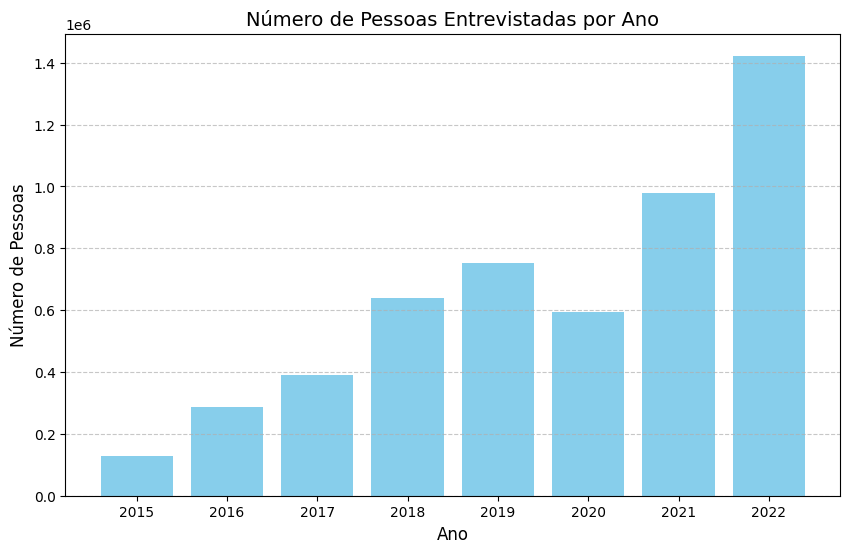

In [24]:

# Agrupar e somar o número de pessoas entrevistadas por ano
entrevistados_por_ano = dados_completos.groupby('Ano')['Adultos Acompanhados'].sum()

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(entrevistados_por_ano.index, entrevistados_por_ano.values, color='skyblue')
plt.title('Número de Pessoas Entrevistadas por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(entrevistados_por_ano.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


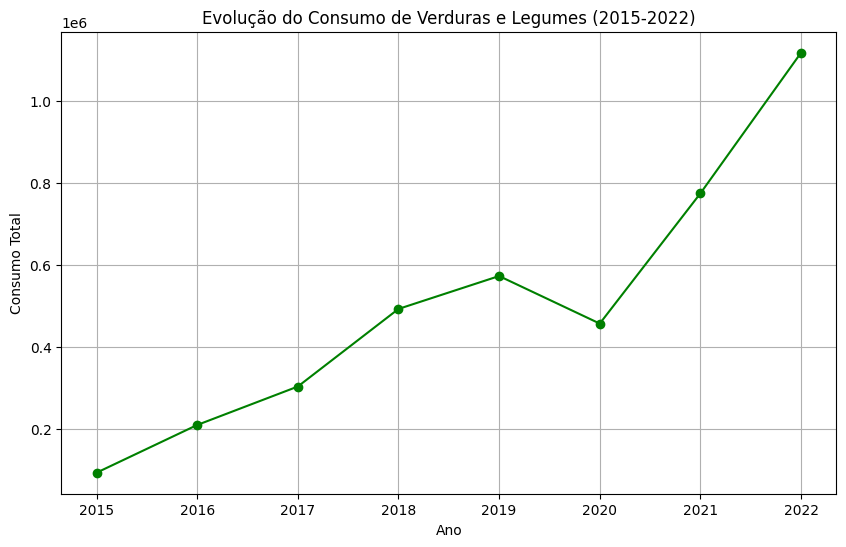

In [22]:
# Gráfico de evolução do consumo total por ano
consumo_por_ano = dados_completos.groupby('Ano')['Consumo Total'].sum()
plt.figure(figsize=(10, 6))
plt.plot(consumo_por_ano.index, consumo_por_ano.values, marker='o', color='green')
plt.title('Evolução do Consumo de Verduras e Legumes (2015-2022)')
plt.xlabel('Ano')
plt.ylabel('Consumo Total')
plt.grid()
plt.show()

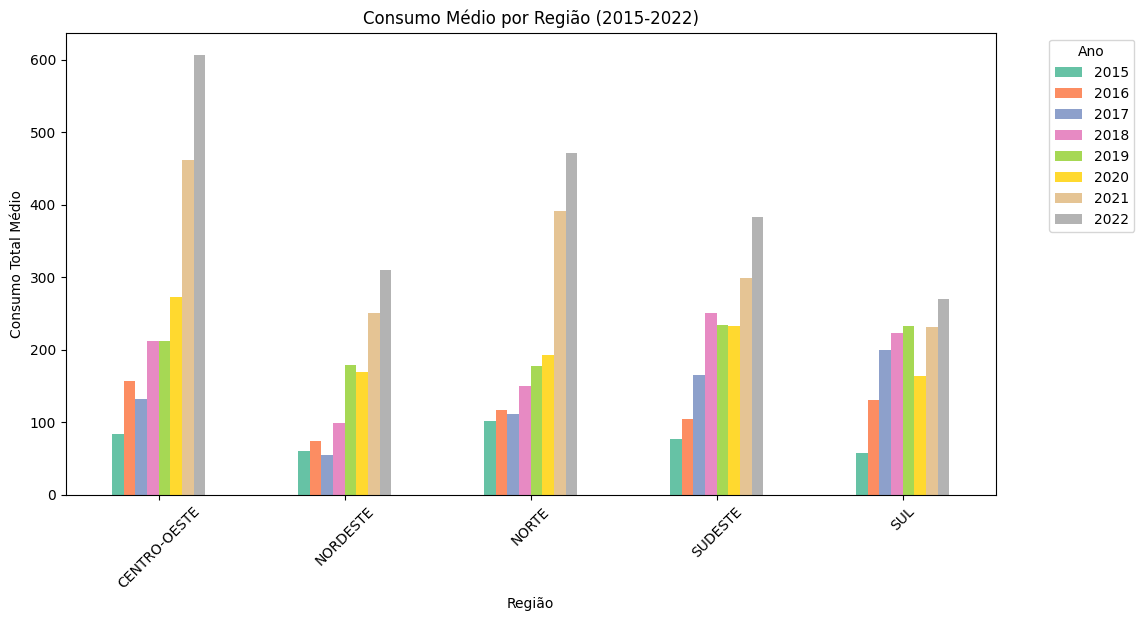

In [23]:
# Gráfico de consumo médio por região
# Calcular o consumo médio por Região e Ano
consumo_regiao_ano = dados_completos.groupby(['Região', 'Ano'])['Consumo Total'].mean().reset_index()

# Pivotar os dados para uma tabela mais legível
tabela_regiao_ano = consumo_regiao_ano.pivot(index='Região', columns='Ano', values='Consumo Total')

# Criar um gráfico para visualizar
tabela_regiao_ano.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Consumo Médio por Região (2015-2022)')
plt.ylabel('Consumo Total Médio')
plt.xlabel('Região')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
